In [1]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

%matplotlib inline

In [2]:
from datasets import load_dataset

# data_en = load_dataset('head_qa', 'en')
data_es = load_dataset('head_qa', 'es' )
data_es

Reusing dataset head_qa (C:\Users\tec005m\.cache\huggingface\datasets\head_qa\es\1.1.0\473dc5357942a3ff52963bd73cad0d167bd1bbc1ca5ca0732ee7372b480dd735)


DatasetDict({
    train: Dataset({
        features: ['name', 'year', 'category', 'qid', 'qtext', 'ra', 'image', 'answers'],
        num_rows: 2657
    })
    test: Dataset({
        features: ['name', 'year', 'category', 'qid', 'qtext', 'ra', 'image', 'answers'],
        num_rows: 2742
    })
    validation: Dataset({
        features: ['name', 'year', 'category', 'qid', 'qtext', 'ra', 'image', 'answers'],
        num_rows: 1366
    })
})

In [3]:
training, validation, testing = data_es['train'], data_es['validation'], data_es['test']

In [4]:
pd.DataFrame(data=training)

,answers,category,image,name,qid,qtext,ra,year
0,"[{'aid': 1, 'atext': 'Son de tipo todo o nada....",biology,,Cuaderno_2013_1_B,1,Los potenciales postsinápticos excitadores:,3,2013
1,"[{'aid': 1, 'atext': 'Músculo liso.'}, {'aid':...",biology,,Cuaderno_2013_1_B,2,Placa motora es la unión entre la neurona moto...,2,2013
2,"[{'aid': 1, 'atext': 'Fibras musculares lisas....",biology,,Cuaderno_2013_1_B,3,NO generan potenciales de acción:,2,2013
3,"[{'aid': 1, 'atext': 'Corteza premotora.'}, {'...",biology,,Cuaderno_2013_1_B,4,En la iniciación de los movimientos voluntario...,1,2013
4,"[{'aid': 1, 'atext': 'Están inervados por fibr...",biology,,Cuaderno_2013_1_B,5,Los corpúsculos de Pacini:,4,2013
...,...,...,...,...,...,...,...,...
2652,"[{'aid': 1, 'atext': 'Cetonas.'}, {'aid': 2, '...",chemistry,,Cuaderno_2014_1_Q,231,La síntesis con éster malónico es un método im...,5,2014
2653,"[{'aid': 1, 'atext': 'Por utilizar la onda cua...",chemistry,,Cuaderno_2014_1_Q,232,El análisis por redisolución potenciométrica s...,3,2014
2654,"[{'aid': 1, 'atext': 'Sulfanil urea.'}, {'aid'...",chemistry,,Cuaderno_2014_1_Q,233,Tras la reacción de algunos xenobióticos con e...,5,2014
2655,"[{'aid': 1, 'atext': 'Ácido acético.'}, {'aid'...",chemistry,,Cuaderno_2014_1_Q,234,"Indicar, cuál de los compuestos relacionados a...",2,2014


In [5]:
training_categ_count = pd.DataFrame(training).groupby(by='category', as_index=False).agg({'qid': 'count'})
validation_categ_count = pd.DataFrame(validation).groupby(by='category', as_index=False).agg({'qid': 'count'})
testing_categ_count = pd.DataFrame(testing).groupby(by='category', as_index=False).agg({'qid': 'count'})

In [6]:
training_categ_count

,category,qid
0,biology,452
1,chemistry,456
2,medicine,455
3,nursery,384
4,pharmacology,457
5,psychology,453


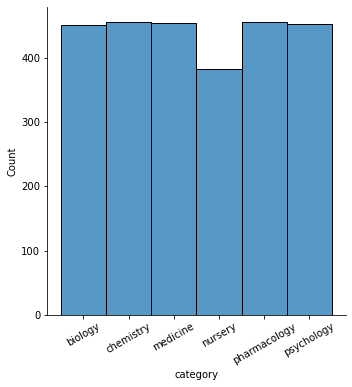

In [7]:
g = sns.displot(training_categ_count, x="category", weights ='qid' )
g.set_xticklabels(rotation=30)

In [8]:
validation_categ_count

,category,qid
0,biology,226
1,chemistry,228
2,medicine,231
3,nursery,230
4,pharmacology,225
5,psychology,226


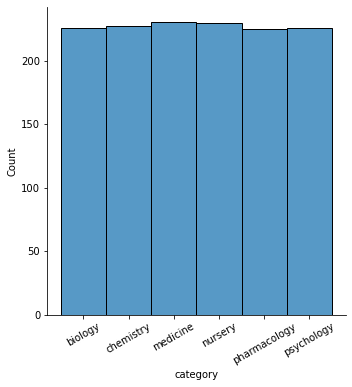

In [9]:
g = sns.displot(validation_categ_count, x="category", weights ='qid' )
g.set_xticklabels(rotation=30)

In [10]:
testing_categ_count

,category,qid
0,biology,454
1,chemistry,458
2,medicine,463
3,nursery,455
4,pharmacology,457
5,psychology,455


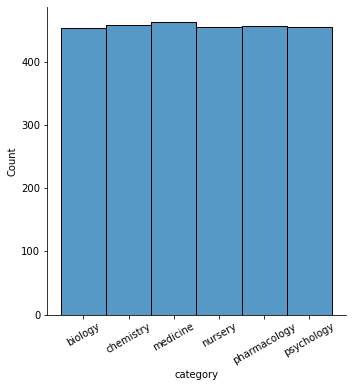

In [11]:
g = sns.displot(testing_categ_count, x="category", weights ='qid' )
g.set_xticklabels(rotation=30)

In [12]:
import spacy
nlp = spacy.load('es_core_news_lg')  
all_stopwords = nlp.Defaults.stop_words.union({'a', 'y', 'o', 'u', 'siguientes'})

In [13]:
def get_word_counter(dataset):
    word_counter = Counter()
    for row in dataset:
    #     answers = row['answers']
        question = row['qtext']
        doc = nlp(question)
        for token in doc:
            if not token.is_punct:
                token = str(token).lower()
                if token not in all_stopwords:
                    if token in word_counter:
                        word_counter[token] += 1
                    else:
                        word_counter[token] = 1
    return word_counter

In [14]:
training_counter = get_word_counter(training)

In [15]:
training_counter.most_common(20)

[('años', 279),
 ('paciente', 231),
 ('tratamiento', 224),
 ('diagnóstico', 123),
 ('presenta', 116),
 ('correcta', 108),
 ('señale', 96),
 ('imagen', 94),
 ('tipo', 91),
 ('mujer', 83),
 ('dl', 79),
 ('consulta', 78),
 ('trastorno', 75),
 ('enfermedad', 73),
 ('mg', 73),
 ('forma', 72),
 ('pregunta', 72),
 ('probable', 72),
 ('acude', 71),
 ('edad', 70)]

In [16]:
validation_counter = get_word_counter(validation)

In [17]:
validation_counter.most_common(20)

[('años', 157),
 ('paciente', 113),
 ('tratamiento', 95),
 ('presenta', 77),
 ('correcta', 69),
 ('señale', 69),
 ('respuesta', 67),
 ('acude', 52),
 ('imagen', 52),
 ('diagnóstico', 51),
 ('tipo', 48),
 ('meses', 47),
 ('dolor', 45),
 ('trastorno', 45),
 ('relación', 43),
 ('consulta', 43),
 ('mujer', 40),
 ('exploración', 38),
 ('fármacos', 37),
 ('forma', 36)]

In [18]:
testing_counter = get_word_counter(testing)

In [19]:
testing_counter.most_common(20)

[('años', 329),
 ('paciente', 229),
 ('tratamiento', 218),
 ('señale', 158),
 ('correcta', 153),
 ('presenta', 139),
 ('diagnóstico', 125),
 ('consulta', 121),
 ('relación', 120),
 ('respuesta', 119),
 ('tipo', 116),
 ('acude', 113),
 ('imagen', 111),
 ('mujer', 108),
 ('dolor', 99),
 ('salud', 96),
 ('trastorno', 96),
 ('afirmaciones', 96),
 ('hombre', 92),
 ('mg', 79)]